### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [3]:
import numpy as np
m = np.arange(12).reshape((3,4))
print(m)
print(np.mean(m,axis=0)) #mean of rows for each column
print(np.mean(m,axis=1)) #mean of columns for each row
print(np.mean(m))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[4. 5. 6. 7.]
[1.5 5.5 9.5]
5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [4]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
outProduct = np.outer(u,v)
res = np.ones((4,4))
print(outProduct)

for i in range(len(u)) :
    for j in range(len(v)) :
        res[i,j]=u[i] * v[j]
print(res)

broadProduct =u[:, np.newaxis] * v;
print(broadProduct)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [5]:
import numpy.random as npr
x = npr.rand(10,6);
x[x<0.1] = 0
print ("10 by 6 matrix:",'\n',x,'\n') # shape=(3,6)

10 by 6 matrix: 
 [[0.63074528 0.34750586 0.85520253 0.27116353 0.69310568 0.56305666]
 [0.2220451  0.50990899 0.147853   0.39438604 0.55759167 0.74704551]
 [0.35108372 0.43411116 0.57244107 0.51849901 0.17115211 0.        ]
 [0.2210113  0.80488997 0.52312374 0.33298121 0.5569456  0.98442387]
 [0.51742844 0.7996617  0.37254175 0.70685002 0.4552428  0.        ]
 [0.36439022 0.6577128  0.32699489 0.30481627 0.82017459 0.84049741]
 [0.75892166 0.69909078 0.51830552 0.7313991  0.44698551 0.34908983]
 [0.30803923 0.29403329 0.41745791 0.15407866 0.49512252 0.77356859]
 [0.78999873 0.90639097 0.17450722 0.71953413 0.36118787 0.46741993]
 [0.9805609  0.         0.39515484 0.58815577 0.33543939 0.42553906]] 



4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

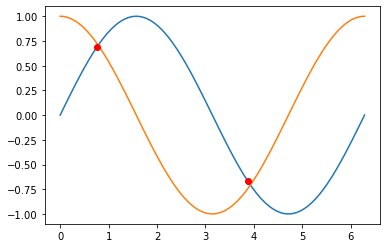

In [7]:
import math
import matplotlib.pyplot as plt
x1 = np.linspace(0, 2 * math.pi, 100)
x2 = x1[::10]
x3 = x2[::-1]
%matplotlib inline
absdiff = x1[np.absolute(np.sin(x1)-np.cos(x1))<0.1]

x = np.sin(x1)
y = np.cos(x1)
intPoints = np.argwhere(np.diff(np.sign(x - y))).flatten()
   
plt.plot(x1,x,x1,y, x1[intPoints],x[intPoints],'ro');

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [8]:
mult_table = np.ones((10,10))

for i in range(len(mult_table)) :
    for j in range(len(mult_table)) :
        mult_table[j][i]=(j+1) * (i+1)
print(mult_table)

anto_diagonal = np.diag(np.rot90(mult_table))
print(anto_diagonal)

upward = np.diag(mult_table, k=1)
print(upward)

[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]]
[10. 18. 24. 28. 30. 30. 28. 24. 18. 10.]
[ 2.  6. 12. 20. 30. 42. 56. 72. 90.]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [9]:
distances = np.array([0,198,303,736,871,1175,1475,1544,1913,448])
grid = np.array(abs(distances-np.array([distances]).T))
print("Matrix of the distances in miles:\n", grid)
grid_km = (grid * 1.609344)
print("Matrix of the distances in km:\n", grid_km)

Matrix of the distances in miles:
 [[   0  198  303  736  871 1175 1475 1544 1913  448]
 [ 198    0  105  538  673  977 1277 1346 1715  250]
 [ 303  105    0  433  568  872 1172 1241 1610  145]
 [ 736  538  433    0  135  439  739  808 1177  288]
 [ 871  673  568  135    0  304  604  673 1042  423]
 [1175  977  872  439  304    0  300  369  738  727]
 [1475 1277 1172  739  604  300    0   69  438 1027]
 [1544 1346 1241  808  673  369   69    0  369 1096]
 [1913 1715 1610 1177 1042  738  438  369    0 1465]
 [ 448  250  145  288  423  727 1027 1096 1465    0]]
Matrix of the distances in km:
 [[   0.        318.650112  487.631232 1184.477184 1401.738624 1890.9792
  2373.7824   2484.827136 3078.675072  720.986112]
 [ 318.650112    0.        168.98112   865.827072 1083.088512 1572.329088
  2055.132288 2166.177024 2760.02496   402.336   ]
 [ 487.631232  168.98112     0.        696.845952  914.107392 1403.347968
  1886.151168 1997.195904 2591.04384   233.35488 ]
 [1184.477184  865.827072  69

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [10]:
def findPrimes(N):
    numbers = np.arange(N)
    mask = numbers != 0
    
    # optimization suggested
    for i in range(2,int(np.sqrt(N))):
        if mask[i] == True:
            for j in range(i**2,N,i):
                mask[j] = False
                
    return numbers[mask]

%timeit findPrimes(100)
print(findPrimes(100))

30.3 µs ± 1.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
[ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [ ]:
import numpy.random as npr
npr.seed(123)

walkers = 1000
steps = 200
walk = npr.randint(0,2,size=(walkers,steps))
walk[walk == 0] = -1 #,mette a -1 gli zeri in modo da avere solo -1 e 1
distances = np.zeros((walkers,steps))
for i in range(walkers):
    distances[i,0] = walk[i,0]
    for j in range(1,steps):
        distances[i,j] = distances[i,j-1] + walk[i,j]

distances *= distances
mean = np.sqrt(distances.mean(axis=0))

plt.plot(np.arange(steps),mean)
plt.plot(np.arange(steps),np.sqrt(np.arange(steps))) #just to prove the trend sqrt(t)-like

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

Statistical properties forharesdataset:
sum 715700.0
argmin 17
mean 34080.95238095238
median 25400.0
std 20897.906458089667


Statistical properties forlynxesdataset:
sum 423500.0
argmin 0
mean 20166.666666666668
median 12300.0
std 16254.591536908763


Statistical properties forcarrotsdataset:
sum 890400.0
argmin 16
mean 42400.0
median 41800.0
std 3322.5062255844787



 correlation of hares and lynxes 
 [[1.         0.07189206]
 [0.07189206 1.        ]] 

correlation of hares and carrots 
 [[ 1.         -0.01660378]
 [-0.01660378  1.        ]] 

correlation of carrots and lynxes 
 [[ 1.         -0.68057717]
 [-0.68057717  1.        ]] 

1900.0 carrots
1901.0 carrots
1902.0 hares
1903.0 hares
1904.0 lynxes
1905.0 lynxes
1906.0 carrots
1907.0 carrots
1908.0 carrots
1909.0 carrots
1910.0 carrots
1911.0 carrots
1912.0 hares
1913.0 hares
1914.0 hares
1915.0 lynxes
1916.0 carrots
1917.0 carrots
1918.0 carrots
1919.0 carrots
1920.0 carrots


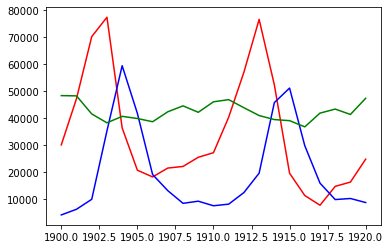

In [16]:
file_name ='populations.txt'
data=np.loadtxt(file_name)
years = data[:,0]
hares = data[:,1]
lynxes = data[:,2]
carrots = data[:,3]

dataset = ''
plt.plot(years, hares, 'r', label='hares')
plt.plot(years, lynxes , 'b', label='lynxes')
plt.plot(years, carrots, 'g', label='carrots')

dataNames = {
    'hares':hares,
    'lynxes':lynxes,
    'carrots':carrots
}
for dataset in ['hares','lynxes','carrots']:
    print('Statistical properties for'+dataset+'dataset:')
    for function in ['sum','argmin','mean','median','std']:
        print (function, getattr(np, function)(dataNames[dataset]))
    print('\n')
    
print('\n','correlation of hares and lynxes', '\n',  getattr(np, 'corrcoef')(hares,lynxes),'\n')
print('correlation of hares and carrots', '\n',  getattr(np, 'corrcoef')(hares,carrots),'\n')
print('correlation of carrots and lynxes', '\n',  getattr(np, 'corrcoef')(carrots,lynxes),'\n',)

titles=["hares","lynxes","carrots"]
maxVals = np.argmax(data, axis = 1)
for index,row in enumerate(maxVals):
    print(years[index],titles[row-1])